In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
import seaborn as sb

In [19]:
df = pd.read_csv("D:\PROGRAMMING\DATASETS\health care diabetes.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
X = df.iloc[:, :-1]
y = df[['Outcome']]

f_c = list(X.columns)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

In [24]:
y_p = dtc.predict(X_test)
print(metrics.accuracy_score(y_test, y_p))

0.7083333333333334


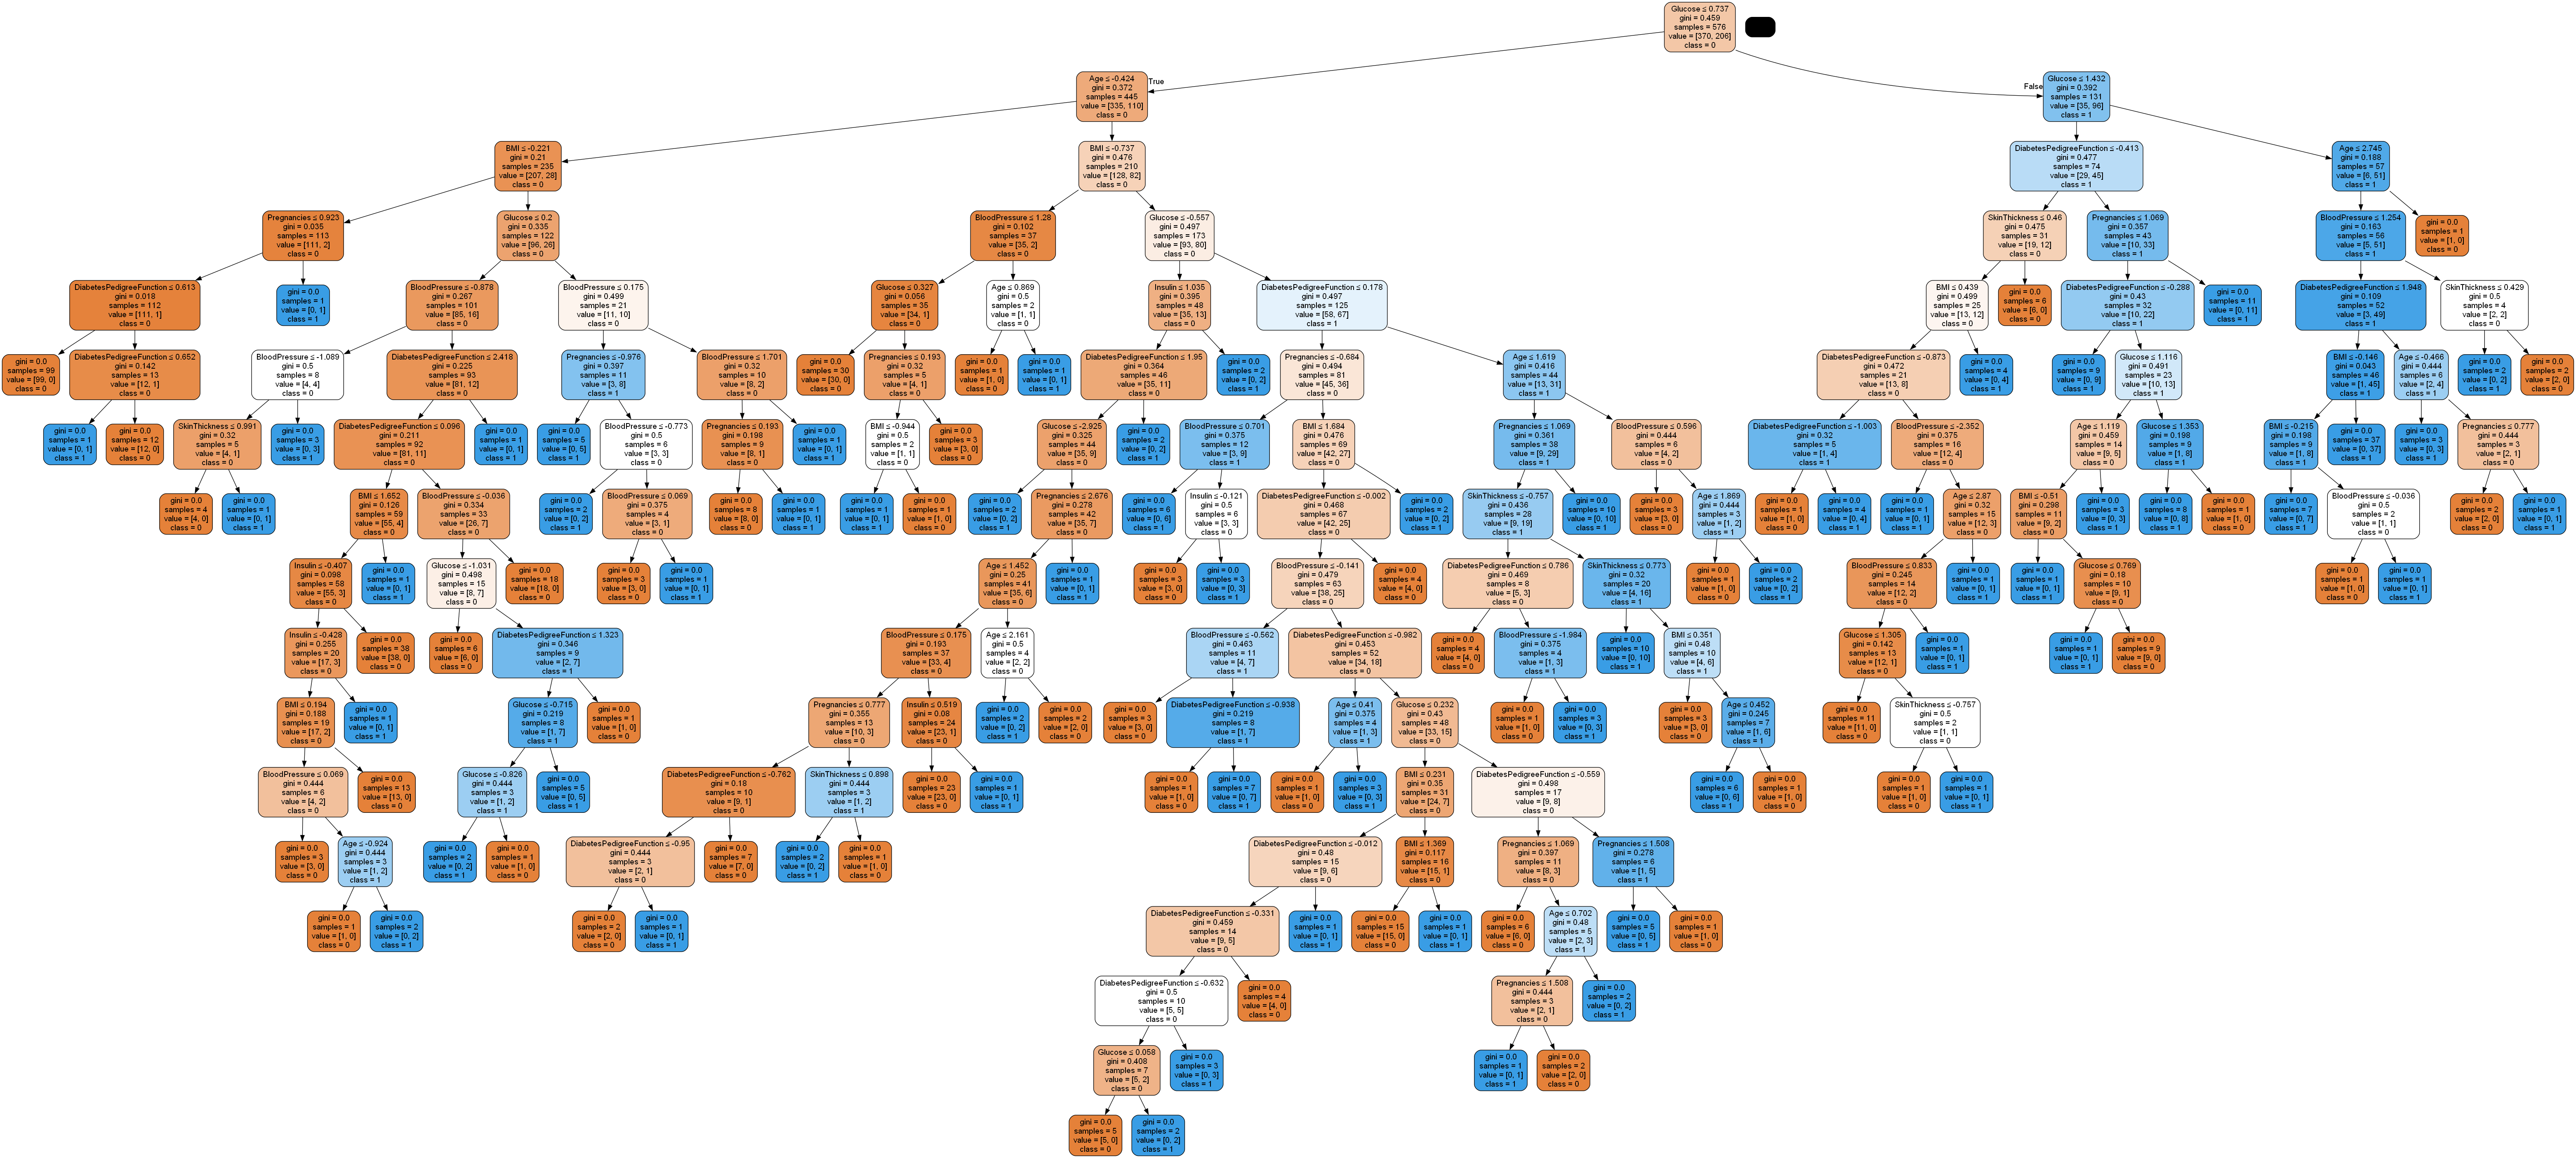

In [25]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = f_c,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [28]:
## Pruning the decision tree
dtc_p = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtc_p = dtc_p.fit(X_train, y_train)
y_predict_p = dtc_p.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict_p))

0.7760416666666666


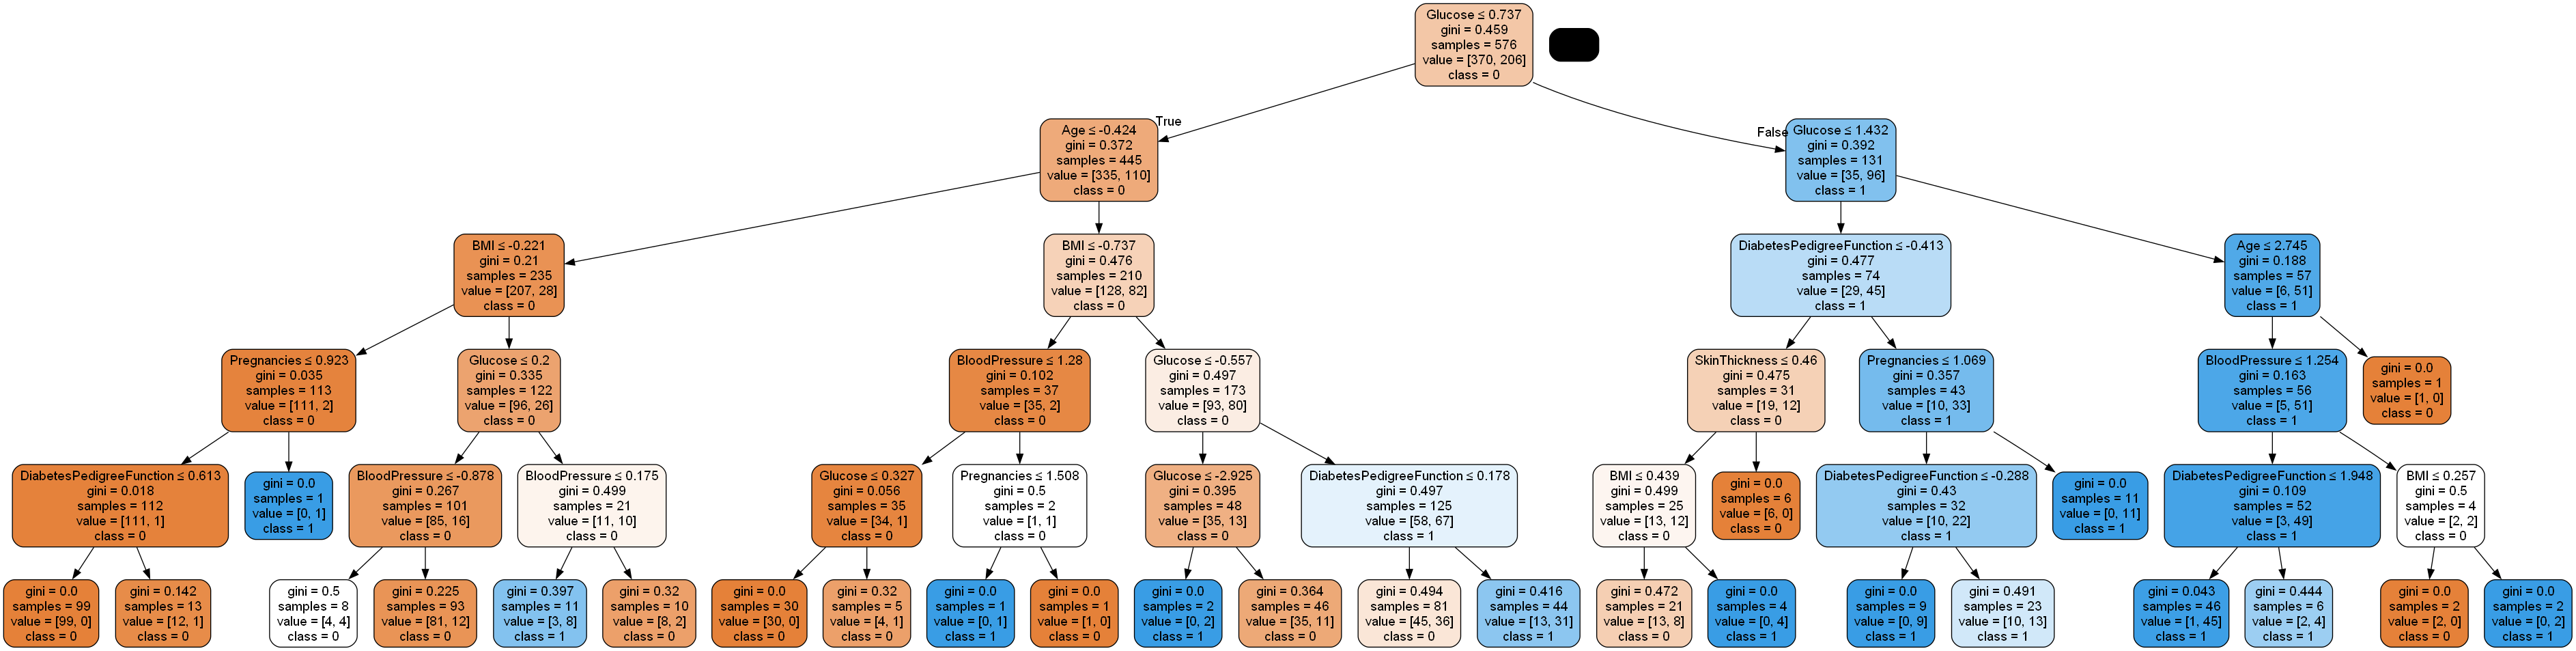

In [30]:
dot_data = StringIO()
export_graphviz(dtc_p, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = f_c,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())